# Problem Statement:

# Auction: Players who can fulfill the role of pinch hitter in powerplay for CSK

- Player Analysis
- Team Analysis
- Batter evaluation (ranking) for that particular role

# Keywords: Pinch Hitter, PowerPlay, CSK

- Quatifying these terminologies:
    - Pinch Hitter = High SR, Low Balls per Boundary, Decent Runs, Decent Balls faced
    - PowerPlay =   1-6 overs
    - CSK = Analysis fro the team

In [26]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dell = pd.read_csv('deliveries.csv')
matt = pd.read_csv('matches.csv')

# Terminologies used
- SR = Strike Rate
- RPI = Runs Per Innings
- BPB = Balls Per Innings
- BPD = Balls Per Boundaries

# PART 1: Player Stats


In [10]:
def balls_per_dis(balls, outs):
    if outs > 0:
        return balls/outs
    else:
        return balls/1

def balls_per_bound(balls,boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

def playerstats(df):
    
    df['is0'] = df['batsman_runs'].apply(lambda x : 1 if x==0 else 0)
    df['is1'] = df['batsman_runs'].apply(lambda x : 1 if x==1 else 0)
    df['is2'] = df['batsman_runs'].apply(lambda x : 1 if x==2 else 0)
    df['is3'] = df['batsman_runs'].apply(lambda x : 1 if x==3 else 0)
    df['is4'] = df['batsman_runs'].apply(lambda x : 1 if x==4 else 0)
    df['is6'] = df['batsman_runs'].apply(lambda x : 1 if x==6 else 0)

    runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs':'runs'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id':'innings'})
    outs = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count().reset_index().rename(columns = {'player_dismissed':'outs'}))
    sixers = pd.DataFrame(df.groupby(['batter'])['is6'].sum()).reset_index().rename(columns = {'is6':'sixers'})
    fours = pd.DataFrame(df.groupby(['batter'])['is4'].sum()).reset_index().rename(columns = {'is4':'fours'})
    
    dots = pd.DataFrame(df.groupby(['batter'])['is0'].sum()).reset_index().rename(columns = {'is0':'dots'})

    
    df = pd.merge(innings, runs, on = 'batter').merge(balls, on = 'batter').merge(outs, on = 'batter').merge(fours,  on = 'batter').merge(sixers,  on = 'batter')
    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis=1)
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dis(x['balls'],x['outs']), axis=1) #BPD: Balls Per Dismissals
    df['BPB'] = df.apply(lambda x: balls_per_bound(x['balls'], (x['fours'] + x['sixers'])), axis=1) #BPB: Ball Per Boundaries

    #df['Dot_percent'] = df.apply(lambda x: (x['dots']/x['balls']), axis=1)
    
    return df

In [11]:
df = playerstats(dell)

In [12]:
df.head()

,batter,innings,runs,balls,outs,fours,sixers,RPI,SR,BPD,BPB
0,A Ashish Reddy,23,280,196,15,16,15,12.173913,142.857143,13.066667,6.322581
1,A Badoni,35,634,505,26,46,24,18.114286,125.544554,19.423077,7.214286
2,A Chandila,2,4,7,1,0,0,2.000000,57.142857,7.000000,7.000000
3,A Chopra,6,53,75,5,7,0,8.833333,70.666667,15.000000,10.714286
4,A Choudhary,3,25,20,2,1,1,8.333333,125.000000,10.000000,10.000000


# Performance in different phases of play

In [13]:
def phase(over):
     #Powerplay 0.1 - 5.6
    if over < 6:
        return 'PowerPlay'
    #middle-over 6.1-14.6
    elif over < 15:
        return 'MiddleOver'
    else:
        return 'DeathOver'

In [14]:
dell['phase'] = dell['over'].apply(lambda x: phase(x))

In [15]:
def phasesofplay(df, curr_phase):

    df = df[df.phase == curr_phase]
    df.reset_index(inplace = True, drop = True)

    df['is0'] = df['batsman_runs'].apply(lambda x : 1 if x==0 else 0)
    df['is1'] = df['batsman_runs'].apply(lambda x : 1 if x==1 else 0)
    df['is2'] = df['batsman_runs'].apply(lambda x : 1 if x==2 else 0)
    df['is3'] = df['batsman_runs'].apply(lambda x : 1 if x==3 else 0)
    df['is4'] = df['batsman_runs'].apply(lambda x : 1 if x==4 else 0)
    df['is6'] = df['batsman_runs'].apply(lambda x : 1 if x==6 else 0)

    runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs':'runs'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id':'innings'})
    outs = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count().reset_index().rename(columns = {'player_dismissed':'outs'}))
    sixers = pd.DataFrame(df.groupby(['batter'])['is6'].sum()).reset_index().rename(columns = {'is6':'sixers'})
    fours = pd.DataFrame(df.groupby(['batter'])['is4'].sum()).reset_index().rename(columns = {'is4':'fours'})
    
    dots = pd.DataFrame(df.groupby(['batter'])['is0'].sum()).reset_index().rename(columns = {'is0':'dots'})

    
    df = pd.merge(innings, runs, on = 'batter').merge(balls, on = 'batter').merge(outs, on = 'batter').merge(fours,  on = 'batter').merge(sixers,  on = 'batter')
    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis=1)
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dis(x['balls'],x['outs']), axis=1) #BPD: Balls Per Dismissals
    df['BPB'] = df.apply(lambda x: balls_per_bound(x['balls'], (x['fours'] + x['sixers'])), axis=1) #BPB: Ball Per Boundaries

    return df

In [16]:
pp_df = phasesofplay(dell, 'PowerPlay')
mid_df = phasesofplay(dell, 'MiddleOver')
death_df = phasesofplay(dell, 'DeathOver')

C:\Users\ramas\AppData\Local\Temp\ipykernel_22284\3323539281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is0'] = df['batsman_runs'].apply(lambda x : 1 if x==0 else 0)
C:\Users\ramas\AppData\Local\Temp\ipykernel_22284\3323539281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is1'] = df['batsman_runs'].apply(lambda x : 1 if x==1 else 0)
C:\Users\ramas\AppData\Local\Temp\ipykernel_22284\3323539281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [18]:
pp_df.tail()

,batter,innings,runs,balls,outs,fours,sixers,RPI,SR,BPD,BPB
357,YV Takawale,8,121,137,5,19,1,15.125000,88.321168,27.400000,6.850000
358,Yashpal Singh,2,17,37,1,2,0,8.500000,45.945946,37.000000,18.500000
359,Younis Khan,1,3,7,1,0,0,3.000000,42.857143,7.000000,7.000000
360,Yuvraj Singh,33,193,197,12,26,5,5.848485,97.969543,16.416667,6.354839
361,Z Khan,1,0,3,1,0,0,0.000000,0.000000,3.000000,3.000000


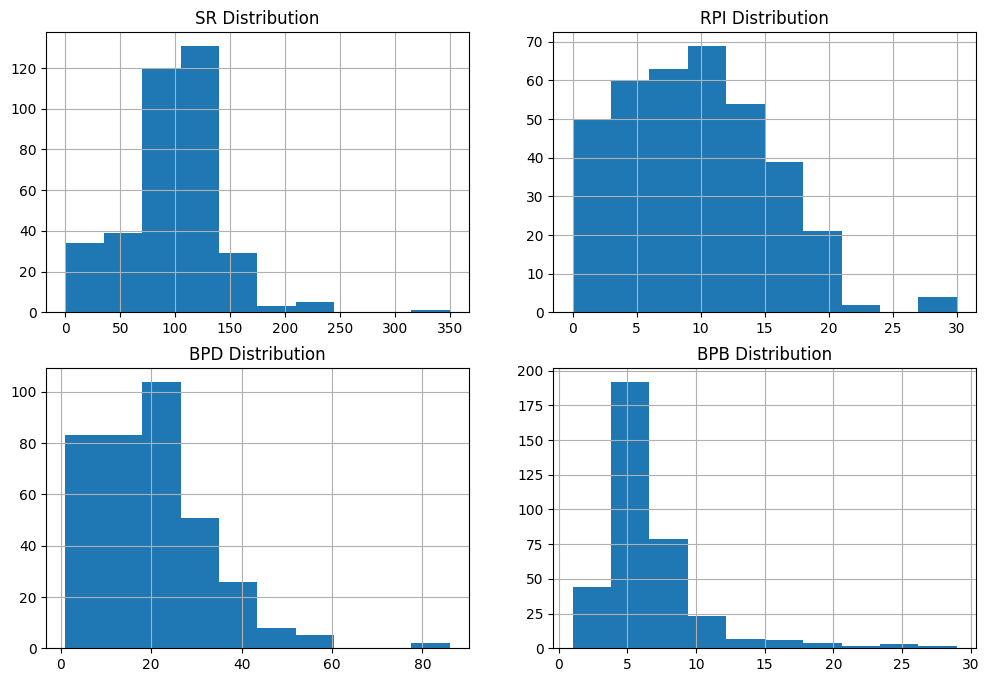

In [32]:
plt.figure(figsize = (12,8))

plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
pp_df.BPB.hist()
plt.title('BPB Distribution')



plt.show()

C:\Users\ramas\AppData\Local\Temp\ipykernel_22284\6085801.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pp_df['RPI'])


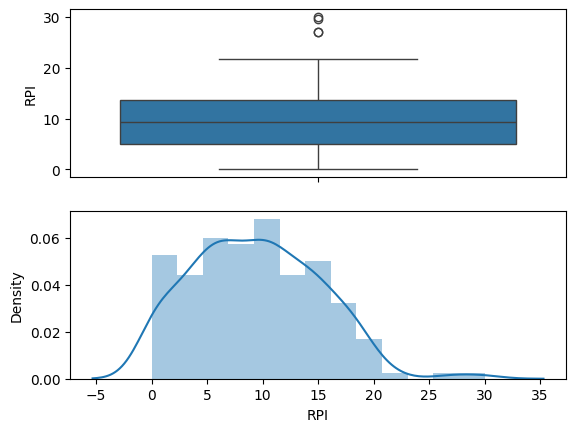

In [40]:
plt.subplot(211)
sns.boxplot(pp_df['RPI'])

plt.subplot(212)
sns.distplot(pp_df['RPI'])
plt.show()

# FINAL PART: USING SATTY METHOD TO IDENTIFY THE PERFECT PLAYER

### Intensity of Importance Numerical Value
- Equal Importance:           1
- Moderate Importance:        3
- Strong Importance:          5
- Very Strong Importance:     7
- Extreme Importance:         9
- Intermediate Values:        2, 4, 6, 8
- Inverse Importance:         1/2, 1/3, ..., 1/9


- RPI is Strongly Important (5) over SR.

- RPI is Moderately Important (3) over BPD.

- RPI is Equally Important (1) to BPB.

- SR is Moderately Important (3) over BPD.

- SR is Strongly Important (5) over BPB.

- BPD is Equally Important (1) to BPB. 


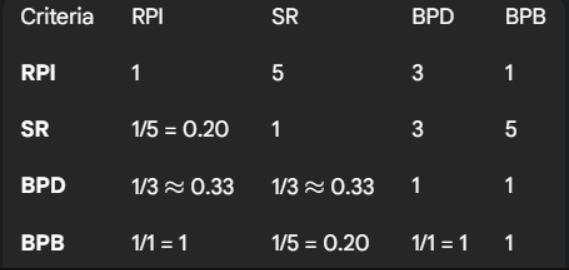

### Normalized Pairwise Comparison

## Calculating Column Sums (CS)

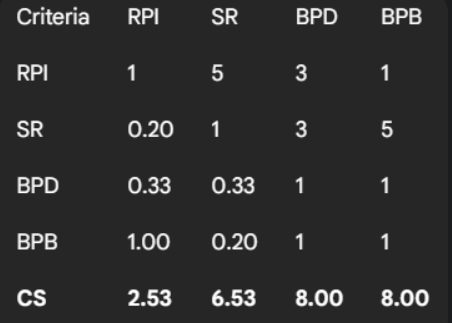

## Calculating Normalized Matrix (($\bar{A}$))
$$\bar{a}_{ij} = \frac{a_{ij}}{\text{CS}_j}$$

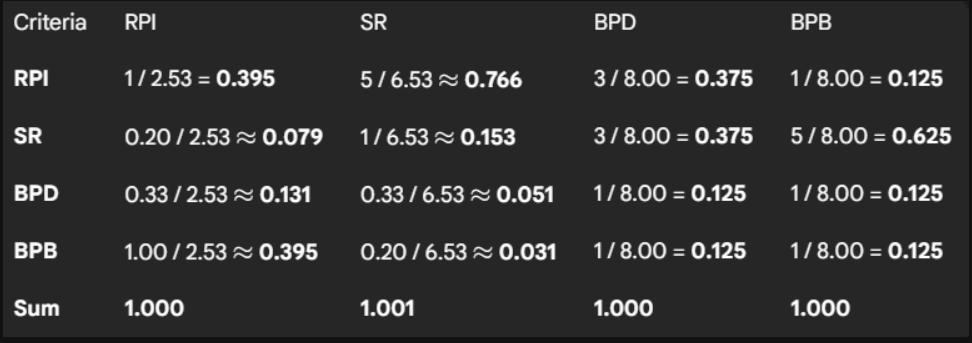

## Priority Vector (Weights)

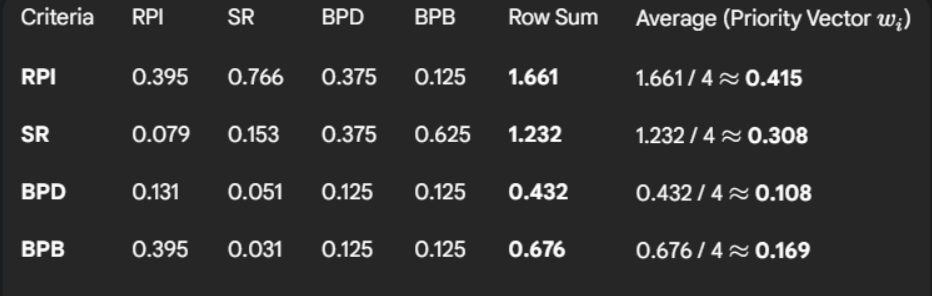


- Criteria Weights:
    - RPI: 0.41
    - SR: 0.38
    - BPD: 0.11
    - BPB: 0.17

# TOPSIS METHOD: To derive conclusion

In [42]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38, 0.41, 0.11, 0.17

In [47]:
pp_df['calc_SR'] = df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPD'] = df['BPD'].apply(lambda x: x*x) 
pp_df['calc_BPB'] = df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(df[['calc_SR', 'calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis=0))

pp_df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr)
pp_df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi)
pp_df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd) 
pp_df['calc_BPB'] = df['calc_BPB'].apply(lambda x: x/sq_bpb)


pp_df['calc_SR'] = df['calc_SR'].apply(lambda x: x/wt_sr)
pp_df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/wt_rpi)
pp_df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/wt_bpd) 
pp_df['calc_BPB'] = df['calc_BPB'].apply(lambda x: x/wt_bpb)

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
best_bpb, worst_bpb = max(df['calc_BPB']), min(df['calc_BPB'])

## Calculation - Comparison against the Best & the Worst values

In [50]:
pp_df['dev_best_sr'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
pp_df['dev_best_rpi'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
pp_df['dev_best_bpd'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
pp_df['dev_best_bpb'] = df['calc_BPB'].apply(lambda x: (x-best_bpb)*(x-best_bpb))

pp_df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_sr'] + x['dev_best_rpi'] + x['dev_best_bpd'] + x['dev_best_bpb'], axis = 1)

pp_df['dev_worst_sr'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
pp_df['dev_worst_rpi'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
pp_df['dev_worst_bpd'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
pp_df['dev_worst_bpb'] = df['calc_BPB'].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))

pp_df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_sr'] + x['dev_worst_rpi'] + x['dev_worst_bpd'] + x['dev_worst_bpb'], axis = 1)


# Final Step: Overall score to each player: (From 0 to 1)

In [51]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt'] / (x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis=1)

In [52]:
pp_df[['batter','score']].head()

,batter,score
0,A Badoni,0.006627
1,A Chopra,0.005150
2,A Raghuvanshi,0.000190
3,A Symonds,0.000884
4,AA Jhunjhunwala,0.003852


# End Result: Top Players suitable for Pinch Hitting in PP for CSK

In [56]:
pp_df = pp_df[pp_df.innings >= 5]
pp_df = pp_df[pp_df.SR >= 135]
pp_df.reset_index(inplace = True, drop = True)

In [57]:
pp_df[['batter','innings','runs','balls','SR','RPI','score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,batter,innings,runs,balls,SR,RPI,score
0,LS Livingstone,16,163,111,146.846847,10.187500,0.024760
1,CA Lynn,40,779,553,140.867993,19.475000,0.014002
2,Abhishek Sharma,40,758,501,151.297405,18.950000,0.011619
3,E Lewis,22,420,298,140.939597,19.090909,0.009727
4,JC Buttler,87,1613,1189,135.660219,18.540230,0.009488
5,YK Pathan,33,361,256,141.015625,10.939394,0.008741
6,RA Tripathi,70,977,716,136.452514,13.957143,0.008541
7,J Fraser-McGurk,9,266,112,237.500000,29.555556,0.007933
8,PD Salt,19,404,242,166.942149,21.263158,0.007891
9,V Sehwag,103,1593,1160,137.327586,15.466019,0.007758
